In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurations
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [2]:
# Import
train = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/train.csv")
stores = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/stores.csv")   
transactions = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/transactions.csv")
oil = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/oil.csv")
holidays = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/holidays_events.csv")
test = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/test.csv")

In [3]:
train.sales = train.sales.astype("float32")
stores.cluster = stores.cluster.astype("int8")

In [4]:
# Merging the data
train_new = train.merge(oil, on = 'date', how='left')
train_new = train_new.merge(holidays, on = 'date', how='left')
train_new = train_new.merge(stores, on = 'store_nbr', how='left')
train_new = train_new.merge(transactions, on = ['date', 'store_nbr'], how='left')
train_new = train_new.rename(columns = {"type_x" : "holiday_type", 
                                  "type_y" : "store_type"})

test_new = test.merge(oil, on = 'date', how='left')
test_new = test_new.merge(holidays, on = 'date', how='left')
test_new = test_new.merge(stores, on = 'store_nbr', how='left')
test_new = test_new.merge(transactions, on = ['date', 'store_nbr'], how='left')
test_new = test_new.rename(columns = {"type_x" : "holiday_type", 
                                "type_y" : "store_type"})

In [5]:
train_new.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.00,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [7]:
# Checking for null values
train_new.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dtype: int64

In [8]:
# Adding new date features
def date_features(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
train1 = date_features(train_new)

<AxesSubplot:>

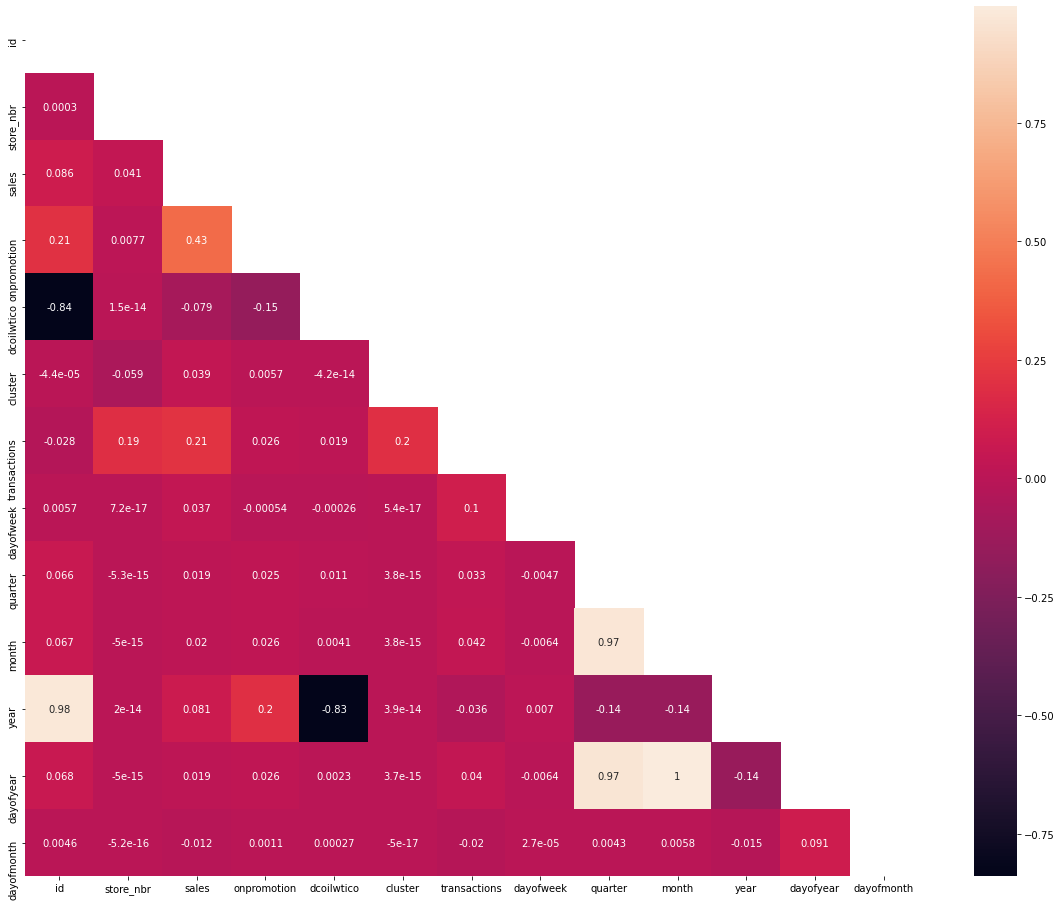

In [9]:
# Correlation graph for features
corr = train_new.corr()
f, ax = plt.subplots(figsize=(20, 16))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask)

## EDA on Stores Data

<AxesSubplot:xlabel='year', ylabel='sales'>

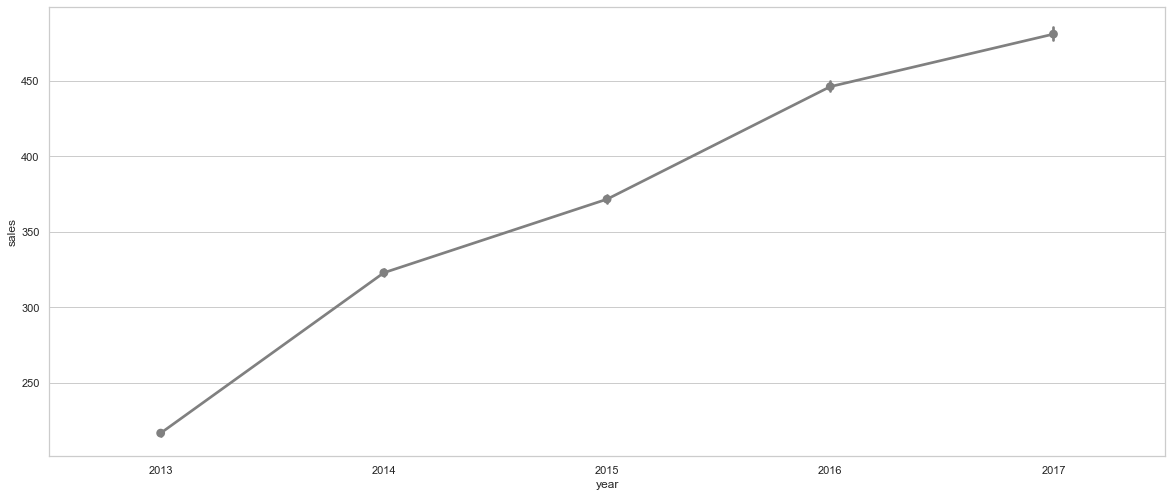

In [10]:
# Visualising the trend in total sales
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
ax=sns.pointplot(x = 'year',y = 'sales',data = train_new ,color = "grey",)
ax

#### Each year, the overall number of sales has increased.

<AxesSubplot:xlabel='month', ylabel='sales'>

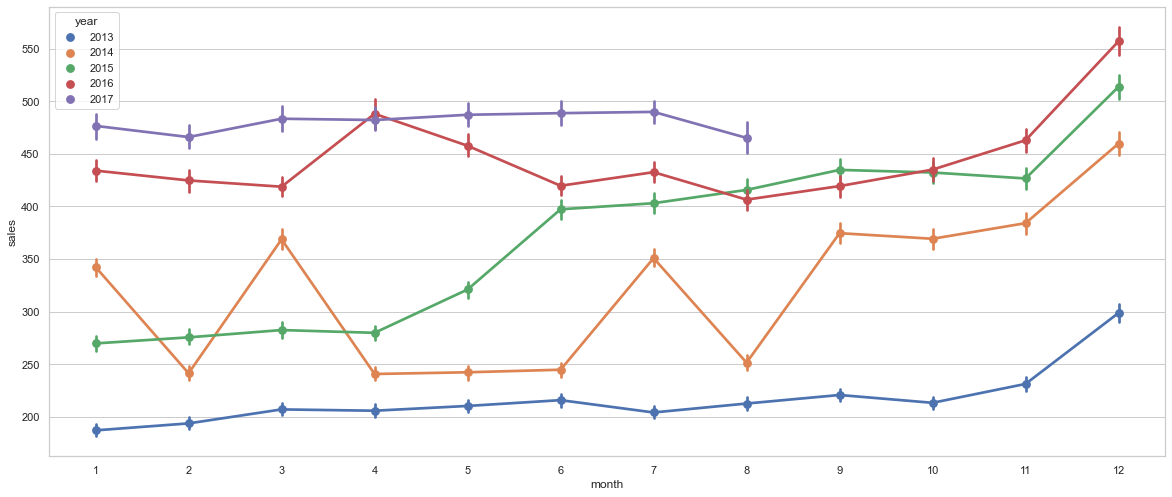

In [11]:
# Visualising the trend in sales per month for each year
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
ax=sns.pointplot(x = 'month', y = 'sales', data = train_new, hue = "year")
ax

#### Because of the holidays, sales climb every December.
#### In 2013, sales are relatively consistent throughout the year.
#### In 2014, we saw a decrease in sales in the months of February, April, May, and June. Then there is a rise in sales in July, but the sales drop again in August, and there is then an increase in sales and a constant trend going forward.
#### In the first several months of 2015, sales were lower than in 2014. However, sales soared following June and have continued to rise.
####  In 2016, there is a noticeable increase in sales in the months of April and March. On April 16, 2016, a magnitude 7.8 earthquake rocked Ecuador. As a result, there has been an increase in sales.
#### In 2017, we have statistics up through the month of August, and sales are consistent and greater than in previous years.

In [12]:
# Visualing popular products sold in december. 
Data_Dec=train_new.loc[train_new['month'] == 12]
Data_Dec=date_features(Data_Dec)

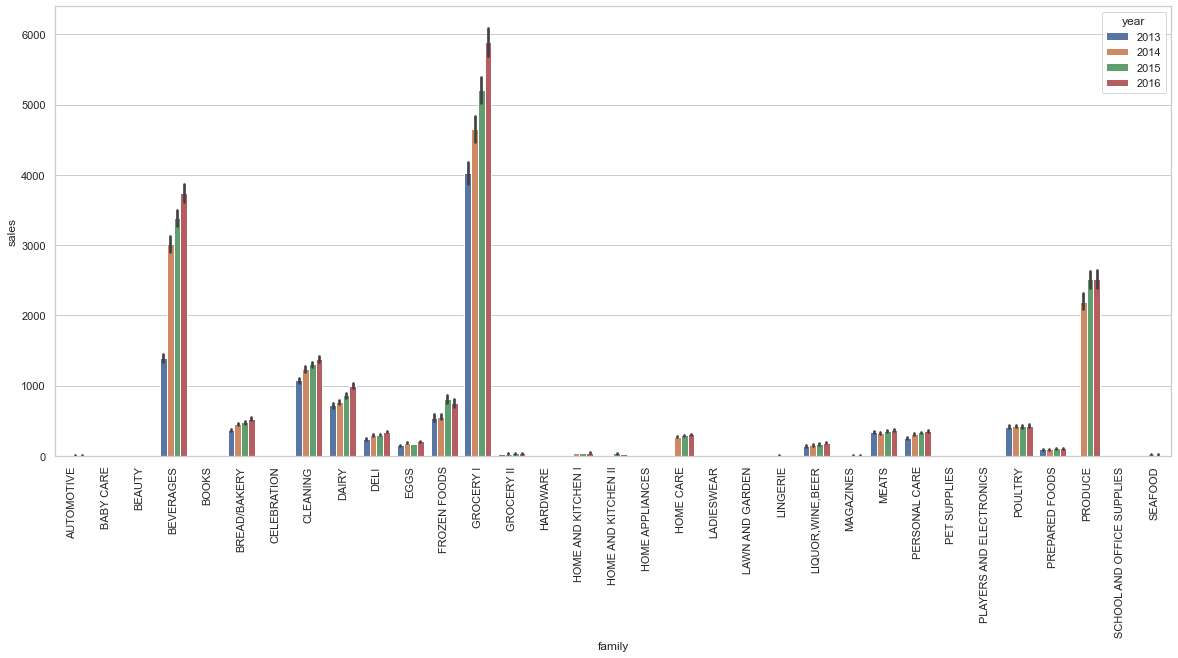

In [13]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
ax=sns.barplot(x = 'family',y = 'sales',data = Data_Dec, hue='year')
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#### Grocery 1, Beverages, and Produce had the greatest sales in each of the previous years. The business is most likely focused on groceries. There is also an uptick in grocery store sales when families gather throughout the Christmas season.

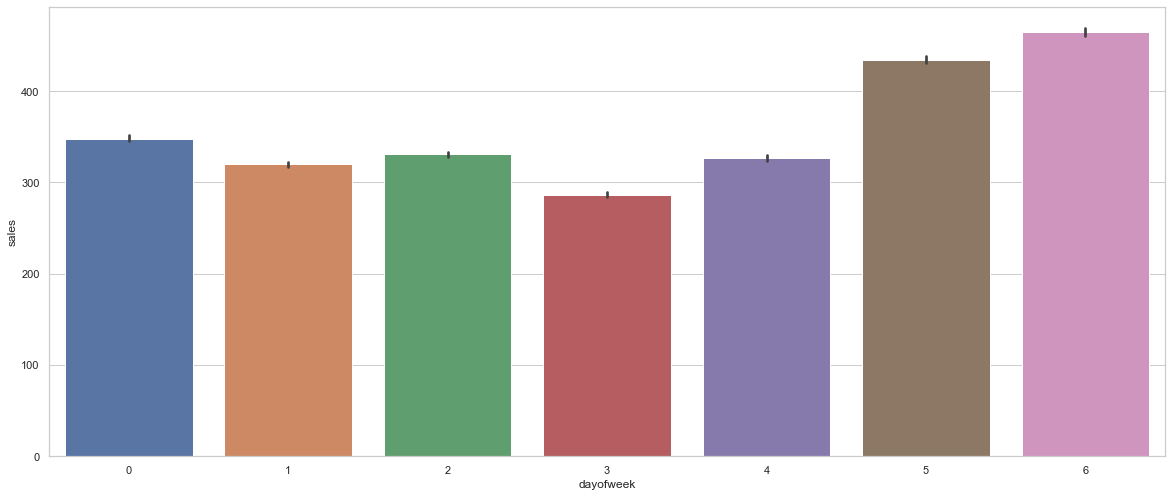

In [14]:
# Visualizing the total sales based on the day of the week. 
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
ax=sns.barplot(x = 'dayofweek',y = 'sales',data = train_new)

####  There are fewer sales in the mid weeks, and compareitvely higher sales during the weekend.

<AxesSubplot:xlabel='month', ylabel='dcoilwtico'>

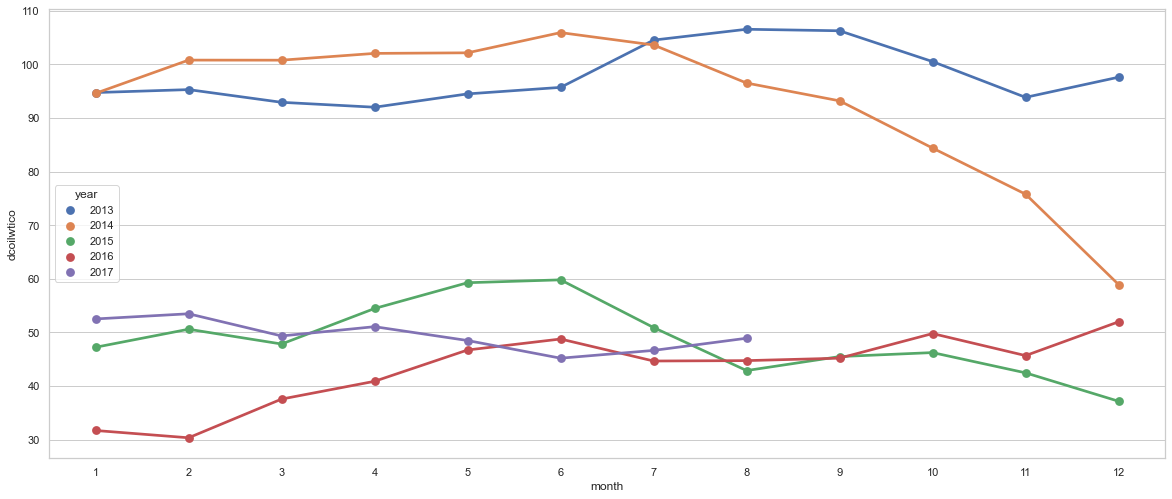

In [15]:
# Visualising oil data
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
sns.pointplot(x = "month",y = 'dcoilwtico',data = train_new,hue = "year")

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

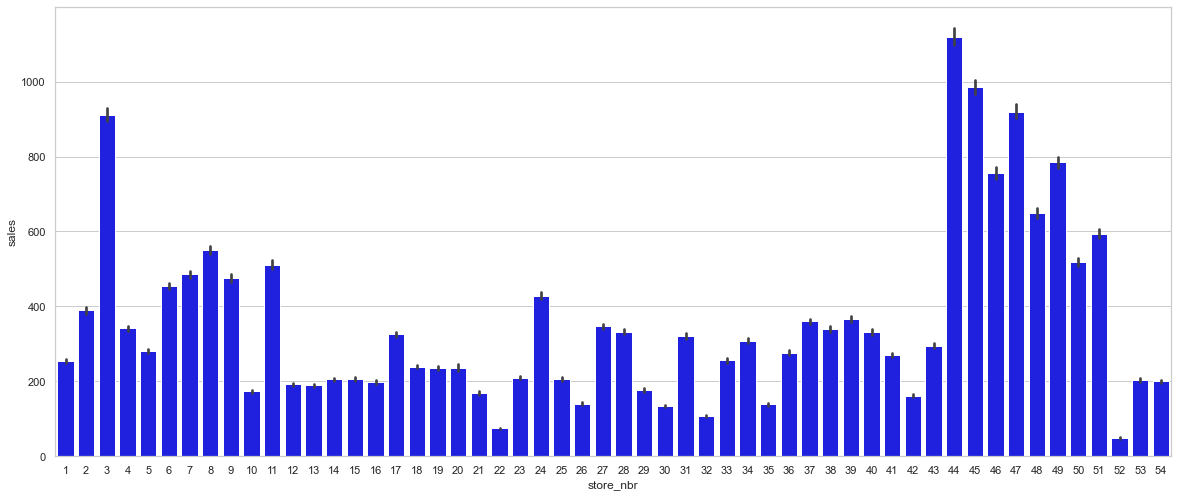

In [17]:
# Visualizing total sales based on store number
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
sns.barplot(x = 'store_nbr',y = 'sales',data = train_new, color = 'blue')

#### Store 44 has the highest number of sales.

In [18]:
# The stores that have highest sales.
stores[44:52]

,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11


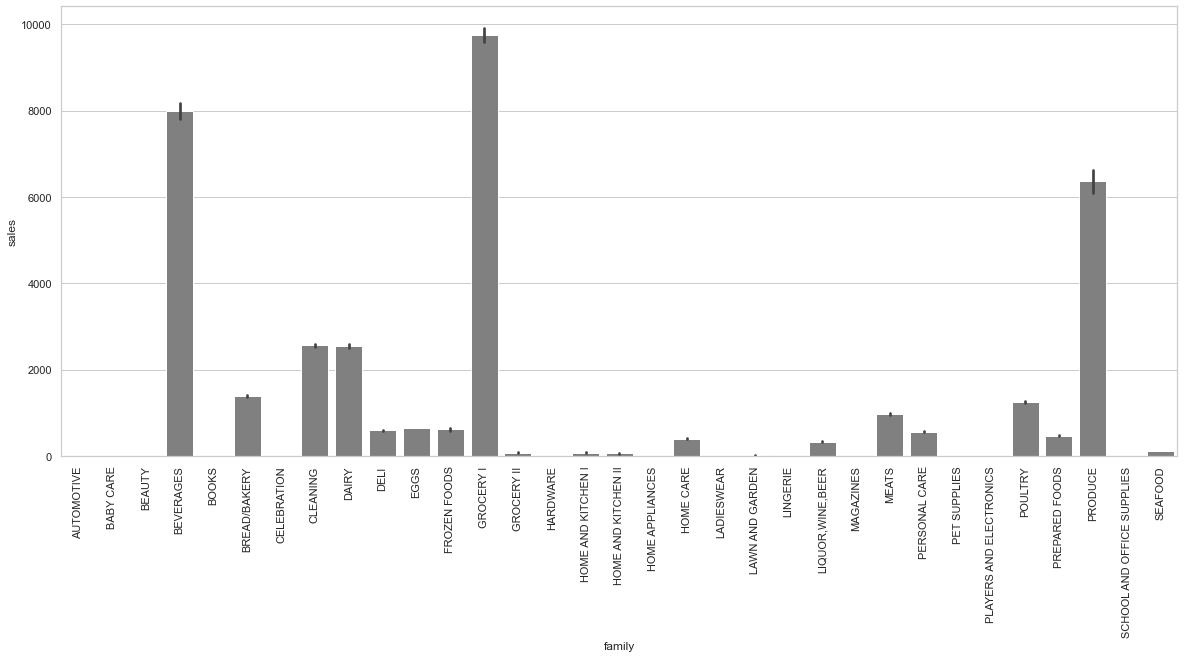

In [19]:
# Visualising the product family based sales in store 44.
store_44=train_new.loc[train_new['store_nbr']==44]

sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
ax=sns.barplot(x = 'family',y = 'sales',data = store_44 ,color = "grey")
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#### Grocery 1, Beverages, and Produce are the most popular items at shop 44.

<AxesSubplot:xlabel='cluster', ylabel='store_nbr'>

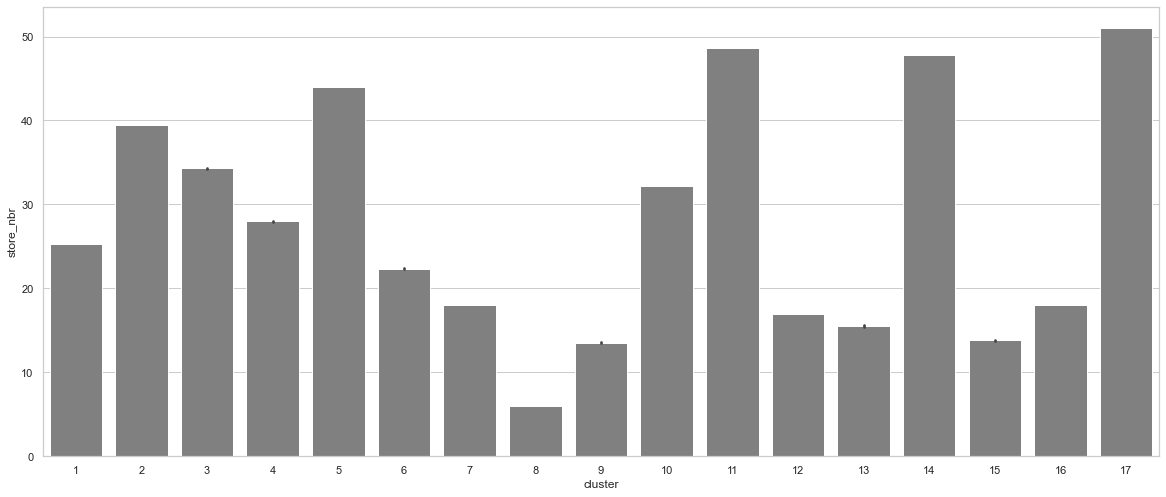

In [20]:
# Visualising clusters with store numbers
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
sns.barplot(x = 'cluster',y = 'store_nbr', data = train_new, color = "grey")

## EDA on Transaction Data

In [66]:

# Import
train = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/train.csv")
stores = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/stores.csv")   
transactions = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/transactions.csv")
oil = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/oil.csv")
holidays = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/holidays_events.csv")
test = pd.read_csv("/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/test.csv")

In [68]:
df1 = train.merge(stores,how = 'left', on='store_nbr')
df2 = df1.merge(transactions, how = 'left', on = ['date','store_nbr'])
df3 = df2.merge(oil, how = 'left', on='date')
df = df3.merge(holidays, how='left', on='date')

In [69]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [70]:
df = df.drop(['locale','locale_name','description','transferred', 'type_y'], axis=1)
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,NaN,NaN


In [71]:
df['date'] = pd.to_datetime(df['date'])

In [72]:
#considering the dataframe with all null values of transcations
df[df['transactions'].isnull()]

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2838523,2790409,2017-04-19,52,POULTRY,0.00,0,Manta,Manabi,A,11,NaN,50.49
2838524,2790410,2017-04-19,52,PREPARED FOODS,0.00,0,Manta,Manabi,A,11,NaN,50.49
2838525,2790411,2017-04-19,52,PRODUCE,0.00,0,Manta,Manabi,A,11,NaN,50.49
2838526,2790412,2017-04-19,52,SCHOOL AND OFFICE SUPPLIES,0.00,0,Manta,Manabi,A,11,NaN,50.49


In [73]:
#setting date as index
df = df.set_index('date')

In [74]:
#create a copy of original dataframe
train_na = df.copy()

#remove all the null valued from the new df
train_na = train_na.dropna()

In [75]:
train_na.head()

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
date,,,,,,,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.00,0,Quito,Pichincha,D,13,2111.00,93.14
2013-01-02,1783,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,2111.00,93.14
2013-01-02,1784,1,BEAUTY,2.00,0,Quito,Pichincha,D,13,2111.00,93.14
2013-01-02,1785,1,BEVERAGES,1091.00,0,Quito,Pichincha,D,13,2111.00,93.14
2013-01-02,1786,1,BOOKS,0.00,0,Quito,Pichincha,D,13,2111.00,93.14


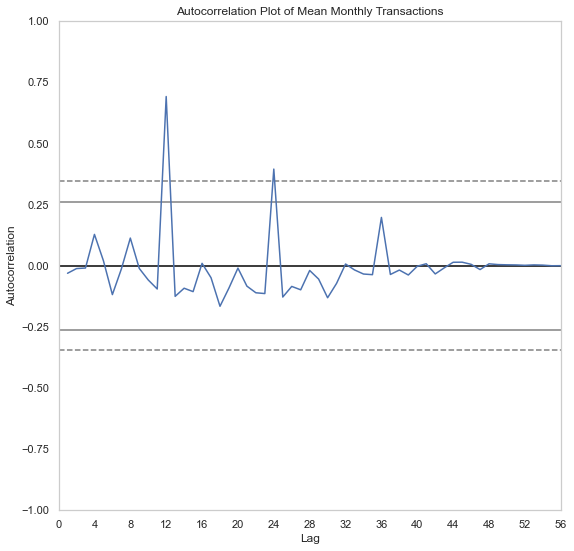

In [76]:
#autocorrelation plot of transaction from 2013 to 2017 sampled over every month
plt.figure(figsize=(9,9))
pd.plotting.autocorrelation_plot(train_na['2013':'2017']['transactions'].resample('1m').mean())
plt.xticks(np.arange(0,60,4))
plt.title('Autocorrelation Plot of Mean Monthly Transactions')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


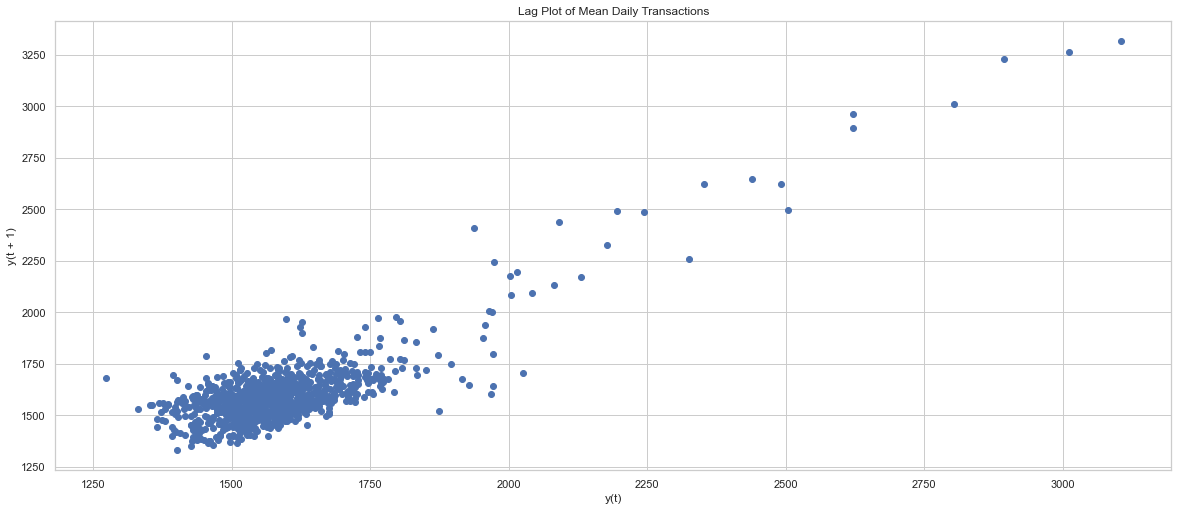

In [77]:
#sampling the transactions for everyday and visulizing the lag plot
pd.plotting.lag_plot(train_na['transactions'].resample('1D').mean(), lag=1)
plt.title('Lag Plot of Mean Daily Transactions')
plt.show()

In [78]:
df1 = df.drop(['dcoilwtico','family','type_x','city','state'], axis=1)

In [79]:
df1.isnull().sum()

id                   0
store_nbr            0
sales                0
onpromotion          0
cluster              0
transactions    249117
dtype: int64

In [80]:
#imputing null values transactions with mean of the previous day
df1 = df1.rolling(window=1782, min_periods=1).mean()

In [83]:
df1.isnull().sum()

id                0
store_nbr         0
sales             0
onpromotion       0
cluster           0
transactions    926
dtype: int64

In [84]:
df1 = pd.concat([df1,df[['dcoilwtico','family','type_x','city','state']]],axis=1)

In [85]:
df1 = df1.fillna(method='ffill')
df1 = df1.fillna(method='bfill')
df1.isnull().sum()

id              0
store_nbr       0
sales           0
onpromotion     0
cluster         0
transactions    0
dcoilwtico      0
family          0
type_x          0
city            0
state           0
dtype: int64

In [86]:
df1['transactions'] = round(df1['transactions'])

In [87]:
df2 = df1.reset_index()

In [88]:
df_trans_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(trans_mean = ('transactions','mean'))
df_trans_month = df_trans_month.reset_index()
df_trans_month['trans_mean'] = round(df_trans_month['trans_mean'])
df_trans_month.head()

,date,trans_mean
0,2013-01-01,770.00
1,2013-01-02,1736.00
2,2013-01-03,1892.00
3,2013-01-04,1691.00
4,2013-01-05,1843.00


In [89]:
df_sales_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(sales_mean = ('sales','mean'))
df_sales_month = df_sales_month.reset_index()
df_sales_month.head()

,date,sales_mean
0,2013-01-01,1.60
1,2013-01-02,118.03
2,2013-01-03,248.96
3,2013-01-04,199.31
4,2013-01-05,227.33


In [90]:
dfa = df_trans_month.merge(df_sales_month, on='date')
dfa = dfa.dropna()
dfa.head()

,date,trans_mean,sales_mean
0,2013-01-01,770.00,1.60
1,2013-01-02,1736.00,118.03
2,2013-01-03,1892.00,248.96
3,2013-01-04,1691.00,199.31
4,2013-01-05,1843.00,227.33


In [91]:
#dfa.reset_index()
dfa['year'] = dfa['date'].dt.year

In [92]:
dfa.to_csv(r'/Users/vaidehiparikh/Downloads/IDMP/IDMP Project/store-sales-time-series-forecasting/file3.csv', index=False)

<Figure size 1440x1440 with 0 Axes>

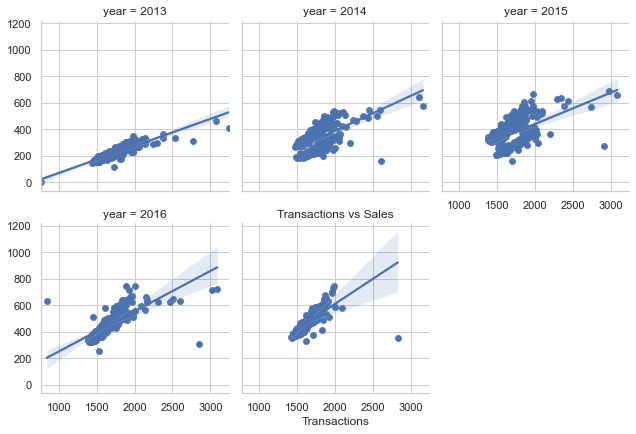

In [93]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(dfa, col="year",palette="husl",col_wrap=3)
g.map_dataframe(sns.scatterplot, x="trans_mean", y="sales_mean")
g.map_dataframe(sns.regplot, x="trans_mean", y="sales_mean")

plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.title("Transactions vs Sales")
plt.show()

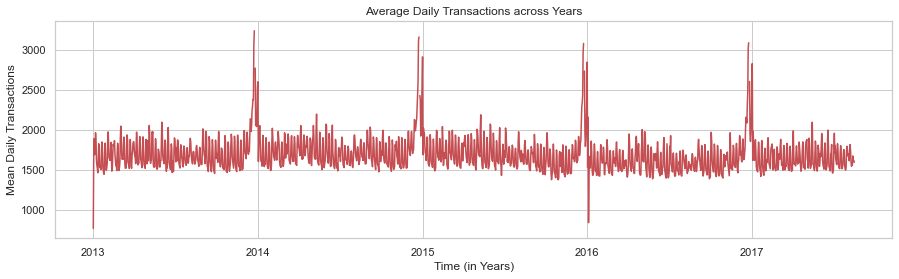

In [94]:
plt.figure(figsize=(15,4))
ax = plt.axes()
plt.plot('date','trans_mean',data=df_trans_month, c='r')
plt.xlabel("Time (in Years)")
plt.ylabel("Mean Daily Transactions")
plt.title("Average Daily Transactions across Years")
plt.show()

In [95]:
dft = df_trans_month.set_index('date')

In [96]:
dfa = dfa.set_index('date')

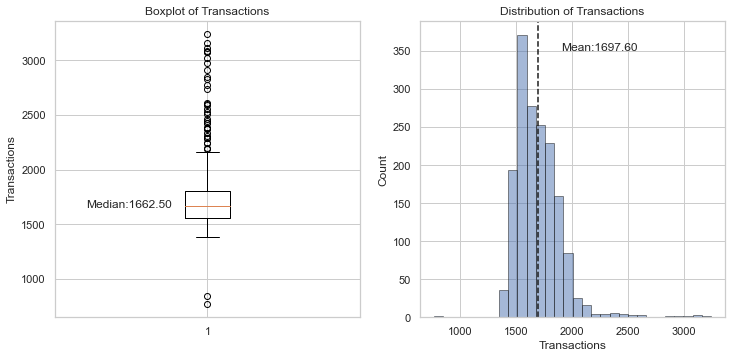

In [97]:
#boxplot of launch mass
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.boxplot(dfa['trans_mean'])
plt.text(0.6,1650,'Median:{:.2f}'.format(dfa['trans_mean'].median()))
plt.title("Boxplot of Transactions")
plt.ylabel("Transactions")

#histogram of launch mass
plt.subplot(2,2,2)
plt.hist(dfa['trans_mean'], bins=30, alpha=0.5, color='b',edgecolor='k')

#Drawing a line to show the mean
plt.axvline(dfa['trans_mean'].mean(), linestyle='dashed', color='k')
plt.text(1900,350,'Mean:{:.2f}'.format(dfa['trans_mean'].mean()))
plt.title("Distribution of Transactions")
plt.xlabel("Transactions")
plt.ylabel("Count")
plt.show()